### UE 4268-EVALUATION FORMATIVE 4- Quantum Machine Learning

### SOUVALBE ADELPHE BEBDANG 

### matricule:21S2761

email:adelphe.souvalbe@facsciences-uy1.cm

Department of Physics - Faculty of Science - University of Yaoundé I

### LABORATOIRE DE PHYSIQUE ATOMIQUE MOLECULAIRE ET BIOPHYSIQUE


### Vendredi,28 avril 2023

In [1]:
import qiskit.tools.jupyter
%qiskit_version_table

## Supervised learning

The basic structure of a supervised pattern recognition or prediction task can be formally defined as follows.

**Given an input domain $\mathcal{X}$ and an output domain $\mathcal{Y}$, a training data set $\mathcal{D} = \{(x^1,y^1),\ldots, (x^M,y^M)\}$ of training pairs $(x^m,y^m)\in\mathcal{X}\times\mathcal{Y}$ with $m = 1,\ldots, M$ of training inputs $x^m$ and target outputs $y^m$, as well as a new unclassified input $\tilde{x}\in\mathcal{X}$, guess or predict the corresponding output $\tilde{y}\in\mathcal{Y}$.**

The input domain $\mathcal{X}$ will mostly be chosen to be the space $\mathbb{R}^N$ of real N-dimensional vectors, or for binary variables, the space of N-bit binary strings $\{0, 1\}^N$. The input vectors are also called **feature vectors** as they represent information on carefully selected features of an instance. In cases where the raw data is not from a numerical domain or does not have an obvious distance measure between instances one has to first find a suitable representation that maps the elements to numerical values.



### Supervised pattern classification tasks in real-life applications

Complete the following sentences with **classification** and **regression**:

1. **....** is about finding a function to predict the relationship between
some input and the dependent continuous output value. Given you know the
income and the effective tax rates of your friends, can you estimate your tax
rate given your income even though you don't know the actual calculation?

2. In **.........**, we try to predict the discrete label of an instance. Given the
input and a set of possible labels, which one is it? 



In the table given below, which gives somes examples of supervised pattern classification tasks in real-life applications, specify in the third colum, the type of tasks by writing (1) for ***Binary classification tasks***; (2) for ***Regression tasks*** and (3) for ***Multi-label classification tasks***.

|Input| Output| Type of tasks
|:-----|:------|-------------|
|Last month's oil price| Tomorrow's oil price| |
|Search history of a user|Chance to click on a car ad| |
Insurance customer details| Chance of claiming| |
|Images| Car, train or plane?| |
|Recording of speech|Words contained in speech| |
|Text segment| Prediction of next word to follow| |
|Text| French or English?| |
|Video| Contains a car?| |
|Email| Is spam?| |
|Spectrum of cancer cell| Malicious?| |


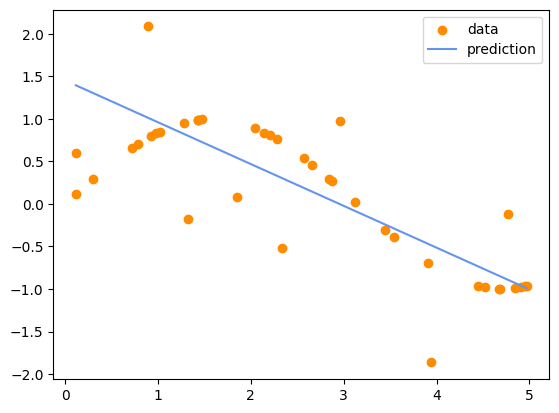

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR
  
# generate synthetic data
X = np.sort(5 * np.random.rand(40, 1),
            axis=0)
y = np.sin(X).ravel()
  
# add some noise to the data
y[::5] += 3 * (0.5 - np.random.rand(8))
  
# create an SVR model with a linear kernel
svr = SVR(kernel='linear')
  
# train the model on the data
svr.fit(X, y)
  
# make predictions on the data
y_pred = svr.predict(X)
  
# plot the predicted values against the true values
plt.scatter(X, y, color='darkorange',
            label='data')
plt.plot(X, y_pred, color='cornflowerblue',
         label='prediction')
plt.legend()
plt.show()

### Life Cycle of a Machine Learning Project

Despite the diverse applications of machine learning, most machine learning projects follow a typical life cycle that includes some (or all) of the following steps : Visualize the data; Examine the data; Split the Dataset; Data Preprocessing; Load the data; Evaluate the models;  Train the Models.  Put that steps in the right order.

1.Gathering data

2.data preparation

3.Data wrangling 

4.analyse Data

5.train model

6.test model

7.deployment

### Sklearn 

**Sklearn** est la librairie qui contient toutes les fonctions de l’état de l'art du Machine Learning. On y trouve les algorithmes les plus importants ainsi que diverses fonctions de pre-processing. 

Avec Sklearn, il suffit d'écrire quelques lignes pour développer des modèles de ML supervisés. Pour un modèle de Support Vector Classifier (SVC) par exemple, les fonctions suivantes
 sont utiliser pour... (compléter le tableau, x et y étant respectivement les features et les labels/target)

|Fonction| pour ....   |
|--------|-------------|
|model = SVC()| .....|
|model.fit(x, y)| ......|
|model.score(x, y) |.....|
|model.predict(x) | ......|

## Train a SMILES Dataset with Support Vector Regression

Use a support vector regression (SVR) to predict QED (quantitative estimation of drug-likeness) from molecules of the ZING Dataset contained in the file `'./Dataset/Zn10.txt`. The input - structural feature of molecules is Morgan fingerprint and the output is QED.

The workflow is
1. Get molecular fingerprints of each molecules 
2. Split the dataset to training set and test set
3. Train a SVR model
4. Check the accuracy of prediction with $R²$ and mean-square error
5. Visualize the results from the model.

**The various necessaries libraries and modules will be import where there needed**.

We recall that the **molecular fingerprint** represents the substructures of a molecule as a vector of binary numbers. It is a molecular structure descriptor use as input to reveal the relationship between molecular structure and properties, called **Quantitative Structure-Activity Relationships (QSAR)**.

In [6]:
# Import libraries 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import os
################################################################################
from rdkit import Chem, DataStructs
from rdkit.Chem import AllChem, PandasTools, Descriptors

In [10]:
PATH = os.getcwd()
data_path = os.path.join(PATH, './Dataset/Zn10.txt')

In [12]:
with open(data_path, 'r') as f:
    content = f.readlines()
    smile = [smi.split()[0] for smi in content]
    
smile

['NC(=O)C1CCCCC1C(F)(F)F',
 'CCCCCNC(=O)N1CCCC1CO',
 'CCC(CC)c1cc(C[NH3+])on1',
 'C[NH2+]C1CCC(c2ccccc2Cl)C1',
 'COc1ccc2c(c1)C(C(C)[NH3+])CN2C',
 'CC1C[NH2+]CCN1CCCc1ccco1',
 'Cc1ccc(S(=O)(=O)C2CC[NH2+]C2)cc1C',
 'COc1cc(C(N)C(F)(F)F)ccc1C(=O)[O-]',
 'Nc1cc(C2CCC[NH2+]2)ccc1O',
 'CN(C)S(=O)(=O)N1CC2CC1C(=O)O2',
 'CC(O)CC[NH2+]C(C)(C)C',
 'C=CC(C)OC(C)CC(=O)[O-]',
 'N#Cc1ccc2cc(C#N)ccc2c1',
 'Cc1ccc(O)c(C2(C)CCCO2)c1',
 'Cc1ccc(C)c2c1CC[NH2+]C2CC(O)C(=O)[O-]',
 'c1cc(C2NCCc3ccc4c(c32)OCO4)co1',
 '[NH3+]CCCn1c(CCO)nc2cccnc21',
 'CC([NH3+])C1CCCc2c1nc(C(F)(F)F)n2C',
 'CC(C)n1c(C2CCC[NH2+]C2)[nH+]c2c1CCCC2',
 'Cc1cc([O-])c2nnc(CC([NH3+])C(=O)[O-])n2n1',
 'C[NH+](C)CC(CC[NH3+])c1ccc(Cl)cc1',
 'CCc1ccc(-c2cnnc([O-])c2C#N)cc1',
 'Cc1cc(C(N)=[NH2+])c(C2CC2)o1',
 'CCCCN(C)c1nccc(C(=O)[O-])n1',
 'CC(C)(C[NH3+])C(=O)Nc1cccc(Cl)c1',
 'CC(=CC(=O)NCC1CC1)c1ccccc1',
 'CCNC(=O)N(CC)C(C)c1ccc(C#N)cc1',
 'CNC(=O)c1cc(O)c2ccc(OC)cc2c1',
 'CCC(CO)Nc1nc(C)c(C)c(Cl)n1',
 'Cc1ccsc1-c1c[nH]cc1C[NH3+]',
 'Cc1